# SOCIAL MEDIA SENTIMENT ANALYSIS

In [412]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")



In [301]:
# Load The Dataset
df = pd.read_csv("sentimentdataset.csv")
df.sample(3)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
476,477,481,"In the dance of positivity, every step is a rh...",Positivity,2016-09-18 19:45:00,DanceHarmony,Instagram,#Positivity #SoulUpliftment,18.0,35.0,France,2016,9,18,19
662,663,667,Mastered the art of creating paper airplanes d...,Joy,2023-08-21 15:45:00,PaperPlaneExpertHighSchool,Instagram,#PaperPlaneExpert #HighSchoolArt,15.0,30.0,USA,2023,8,21,15
701,702,706,Experiencing hate comments for expressing pers...,Hate,2023-09-29 15:45:00,OpinionsHateHighSchool,Twitter,#OnlineOpinions #HighSchoolCriticism,24.0,48.0,USA,2023,9,29,15


## Data PreProcessing

In [304]:
# Basic Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [306]:
# Shape Of The Data
print(f"Shape Of The Data :- Rows={df.shape[0]} & columns={df.shape[1]}")

Shape Of The Data :- Rows=732 & columns=15


In [308]:
# Check The Datatypes:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [310]:
# Descriptive statistics values of all numerical columns:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [312]:
# Check any null value or nut:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [314]:
# Check any duplicate value:
df.duplicated().sum()

0

In [316]:
# Column name of the Dataset:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [318]:
# drop unnecesary column:
df=df.drop(["Unnamed: 0.1","Unnamed: 0","Day","Hour"],axis=1)
df.sample()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month
661,Tried to impress my crush with a smooth conver...,Embarrassed,2023-08-20 17:00:00,CrushFailHighSchool,Twitter,#CrushFail #HighSchoolEmbarrassment,30.0,60.0,Canada,2023,8


In [320]:
# Different Type Of Platform For Sentimental Analysis:
df["Platform"].value_counts()

Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64

In [322]:
df["Platform"] = df["Platform"].str.strip()
df["Platform"].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [324]:
# Different Type Of Country:
df["Country"] = df['Country'].str.strip()
df["Country"].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

## Sentiment Analysis:

In [327]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean and preprocess text without using NLTK
def preprocess_text_alternative(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = text.split()  # Simple whitespace-based tokenization
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords using sklearn
    return " ".join(tokens)

# Apply alternative preprocessing
df["Cleaned_Text"] = df["Text"].apply(preprocess_text_alternative)

# Display sample cleaned text
df[["Text", "Cleaned_Text"]].head()

,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,just finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [329]:
# Sentiment Score Extraction : Use a pre-trained model to analyze sentiment :
from textblob import TextBlob

# Function To get sentiment polarity:
def get_sentiment_polarity(Text):
    return TextBlob(Text).sentiment.polarity

# Apply Sentiment analysis
df["Sentiment_Score"] = df["Cleaned_Text"].apply(get_sentiment_polarity)

# Display sample results
df[["Cleaned_Text","Sentiment","Sentiment_Score"]].head()


,Cleaned_Text,Sentiment,Sentiment_Score
0,enjoying beautiful day park,Positive,0.675000
1,traffic terrible morning,Negative,-1.000000
2,just finished amazing workout,Positive,0.600000
3,excited upcoming weekend getaway,Positive,0.375000
4,trying new recipe dinner tonight,Neutral,0.136364


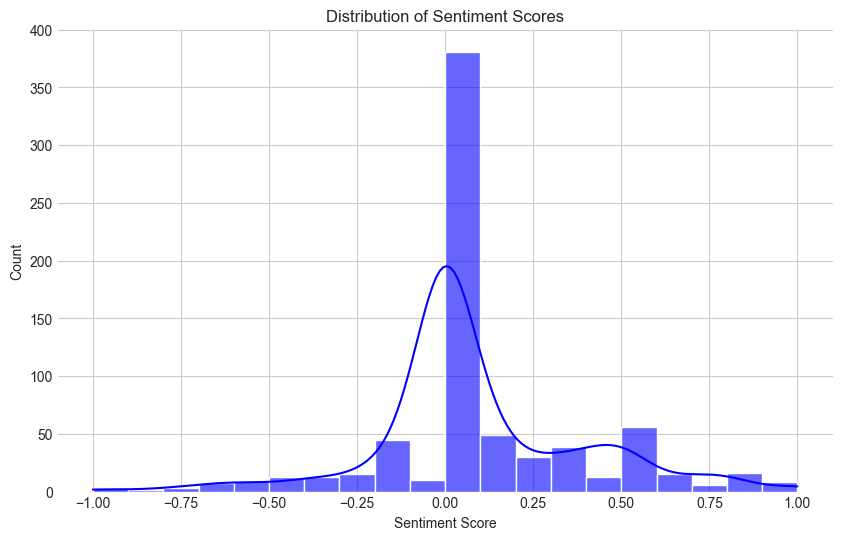

In [331]:
# Visualization of sentiment distribution and trends over time:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set_style("whitegrid")

# Sentiment distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment_Score"], bins=20, kde=True, color="blue",alpha=0.6)
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Scores")
plt.show()


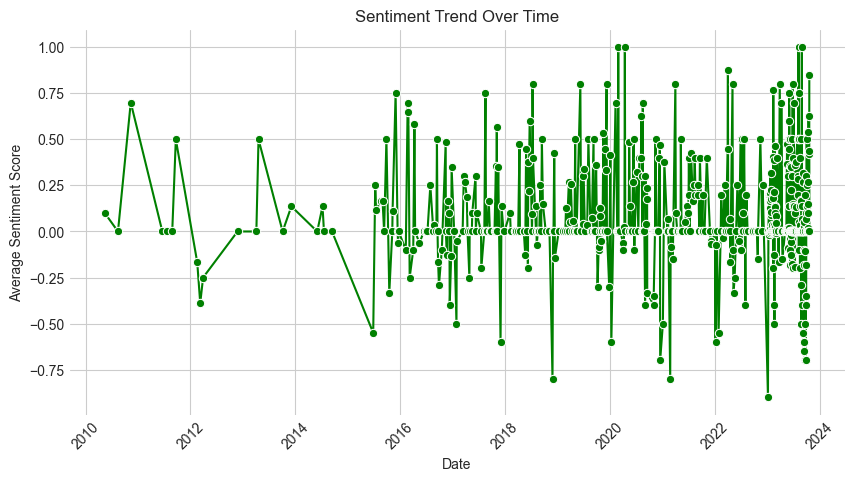

In [349]:
# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Aggregate sentiment scores by date
df_trend = df.groupby(df["Timestamp"].dt.date)["Sentiment_Score"].mean().reset_index()

# Plot sentiment trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_trend["Timestamp"], y=df_trend["Sentiment_Score"], marker="o", color="green")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend Over Time")
plt.xticks(rotation=45)
plt.show()


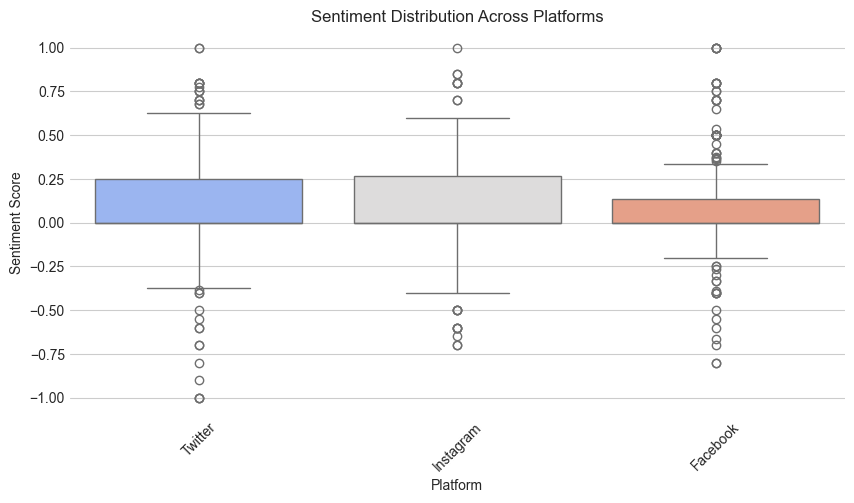

In [353]:
# Set up visualization style
sns.set_style("whitegrid")

# Sentiment analysis by platform
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Platform"], y=df["Sentiment_Score"], palette="coolwarm")
plt.xlabel("Platform")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Distribution Across Platforms")
plt.xticks(rotation=45)
plt.show()


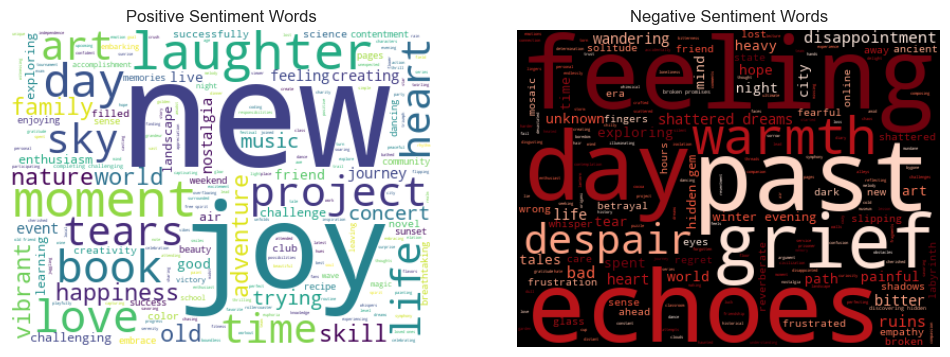

In [377]:
# Import
#!pip install wordcloud
from wordcloud import WordCloud

# Separate positive and negative text
positive_text = " ".join(df[df["Sentiment_Score"] > 0]["Cleaned_Text"])
negative_text = " ".join(df[df["Sentiment_Score"] < 0]["Cleaned_Text"])

# Generate word clouds
plt.figure(figsize=(12, 5))

# Positive sentiment word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

# Negative sentiment word cloud
plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.show()

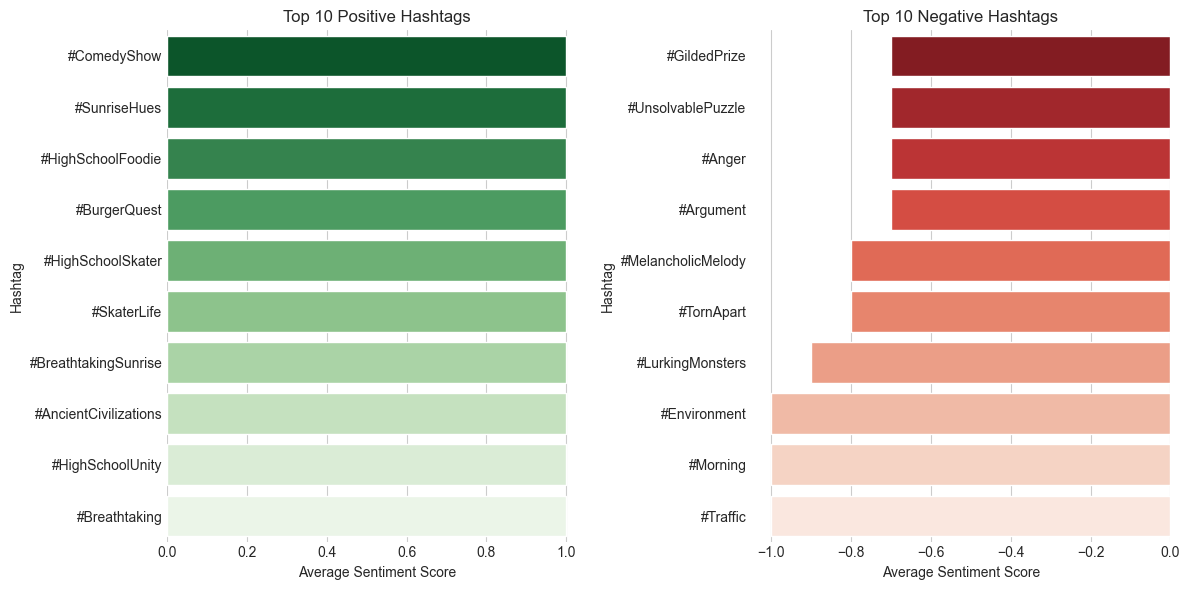

In [385]:
# Extract individual hashtags from the column and count their occurrences :

from collections import defaultdict

# Function to extract hashtags from a string
def extract_hashtags(text):
    return [tag.strip() for tag in text.split() if tag.startswith("#")]

# Create a dictionary to store hashtag sentiment scores
hashtag_sentiments = defaultdict(list)

# Populate the dictionary with sentiment scores for each hashtag
for index, row in df.iterrows():
    hashtags = extract_hashtags(row["Hashtags"])
    for tag in hashtags:
        hashtag_sentiments[tag].append(row["Sentiment_Score"])

# Compute average sentiment score for each hashtag
hashtag_avg_sentiment = {tag: sum(scores) / len(scores) for tag, scores in hashtag_sentiments.items()}

# Convert to DataFrame for visualization
df_hashtags = pd.DataFrame(list(hashtag_avg_sentiment.items()), columns=["Hashtag", "Avg_Sentiment"])

# Sort hashtags by sentiment score
df_hashtags_sorted = df_hashtags.sort_values(by="Avg_Sentiment", ascending=False)

# Plot top positive and negative hashtags
plt.figure(figsize=(12, 6))

# Top 10 positive hashtags
plt.subplot(1, 2, 1)
sns.barplot(y=df_hashtags_sorted["Hashtag"].head(10), x=df_hashtags_sorted["Avg_Sentiment"].head(10), palette="Greens_r")
plt.xlabel("Average Sentiment Score")
plt.title("Top 10 Positive Hashtags")

# Top 10 negative hashtags
plt.subplot(1, 2, 2)
sns.barplot(y=df_hashtags_sorted["Hashtag"].tail(10), x=df_hashtags_sorted["Avg_Sentiment"].tail(10), palette="Reds_r")
plt.xlabel("Average Sentiment Score")
plt.title("Top 10 Negative Hashtags")

plt.tight_layout()
plt.show()


##  Topic Modelling

In [395]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Convert cleaned text into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
doc_term_matrix = vectorizer.fit_transform(df["Cleaned_Text"])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Extract 5 topics
lda_model.fit(doc_term_matrix)

# Get the top words per topic
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topics.append(", ".join(top_words))

# Display topics
topics


['shattered, family, music, life, journey, joy, like, heart, concert, day',
 'book, curiosity, embracing, contentment, new, whispers, lifes, finding, art, ancient',
 'painting, creating, tears, creativity, excitement, upcoming, old, dreams, sky, nostalgia',
 'garden, world, frustration, warmth, winter, challenges, heart, lost, challenging, new',
 'moments, night, hopeful, sense, nature, beauty, friends, feeling, laughter, personal']

In [401]:
# Check unique sentiment values
df["Sentiment"].value_counts()

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

In [416]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Define sentiment mapping
positive_labels = ["Positive", "Joy", "Excitement", "Contentment", "Harmony", "Radiance", "Elegance", "ArtisticBurst", "Adrenaline"]
neutral_labels = ["Neutral", "Balanced", "Calm", "Serene", "Contemplative"]
negative_labels = ["Negative", "Anger", "Frustration", "Disappointment", "Sadness", "Guilt", "Resentment"]

# Map emotions to broader categories
def map_sentiment(sentiment):
    if sentiment in positive_labels:
        return "Positive"
    elif sentiment in neutral_labels:
        return "Neutral"
    elif sentiment in negative_labels:
        return "Negative"
    else:
        return "Neutral"  # Default to neutral if unrecognized

# Apply sentiment mapping
df["Broad_Sentiment"] = df["Sentiment"].apply(map_sentiment)

# Re-encode labels
df["Sentiment_Label"] = label_encoder.fit_transform(df["Broad_Sentiment"])

# Check new distribution
df["Broad_Sentiment"].value_counts()


Broad_Sentiment
Neutral    732
Name: count, dtype: int64

In [423]:
# Get a unique list of all sentiment labels in the dataset
unique_sentiments = df["Sentiment"].unique()
print(unique_sentiments)

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [425]:
# Expanded sentiment mapping
positive_labels = [
    "Positive", "Joy", "Happiness", "Excitement", "Love", "Admiration", "Affection",
    "Awe", "Amusement", "Enjoyment", "Hope", "Pride", "Contentment", "Serenity",
    "Euphoria", "Gratitude", "Enthusiasm", "Optimism", "Confidence", "Accomplishment",
    "Inspiration", "Satisfaction", "Wonder", "Creativity", "Radiance", "Harmony",
    "Freedom", "Adventure", "Thrill", "Celebration", "Whimsy", "Success", "Heartwarming"
]

neutral_labels = [
    "Neutral", "Balanced", "Calm", "Indifference", "Contemplation", "Reflection",
    "Mindfulness", "Tranquility", "Solace", "Acceptance", "Pensive", "Serene"
]

negative_labels = [
    "Negative", "Anger", "Fear", "Sadness", "Disgust", "Frustration", "Disappointment",
    "Regret", "Guilt", "Resentment", "Despair", "Loneliness", "Betrayal", "Heartbreak",
    "Grief", "Helplessness", "Overwhelmed", "Anxiety", "Sorrow", "Melancholy",
    "Jealousy", "Isolation", "Depression", "Desperation", "Darkness", "Miscalculation"
]

# Apply refined sentiment mapping
def refine_sentiment(sentiment):
    sentiment = sentiment.strip()  # Remove leading/trailing spaces
    if sentiment in positive_labels:
        return "Positive"
    elif sentiment in neutral_labels:
        return "Neutral"
    elif sentiment in negative_labels:
        return "Negative"
    else:
        return "Neutral"  # Default to neutral if unrecognized

# Update sentiment classification
df["Broad_Sentiment"] = df["Sentiment"].apply(refine_sentiment)

# Re-encode labels
df["Sentiment_Label"] = label_encoder.fit_transform(df["Broad_Sentiment"])

# Check new sentiment distribution
df["Broad_Sentiment"].value_counts()


Broad_Sentiment
Neutral     369
Positive    270
Negative     93
Name: count, dtype: int64

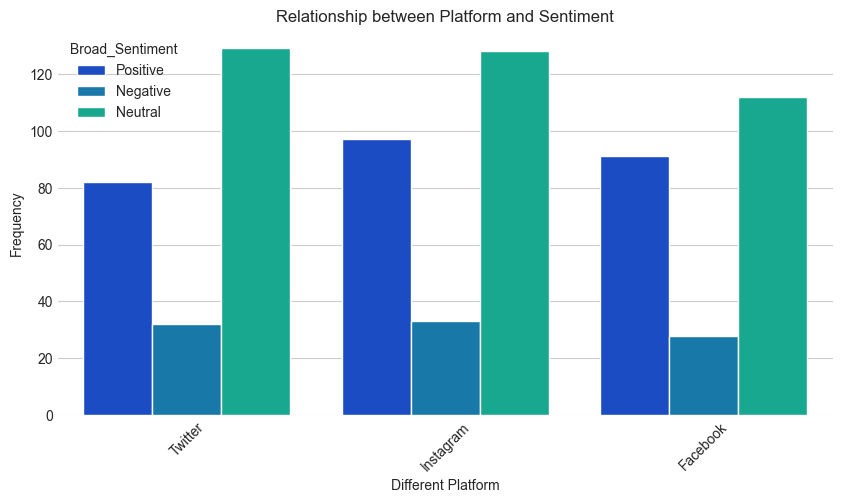

In [427]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Platform', hue='Broad_Sentiment', data=df, palette='winter')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Different Platform')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Split the dataset

In [461]:
from sklearn.model_selection import train_test_split
X = df["Cleaned_Text"] # Text Features
y = df["Sentiment_Label"] # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [463]:
# Feature Extraction using TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display dataset shape after processing
X_train_tfidf.shape, X_test_tfidf.shape

((585, 1000), (147, 1000))

# Function For Model Evaluation :

In [466]:
from sklearn.metrics import accuracy_score, classification_report

In [468]:
# Model-1 : Bernouli Naive Bayes. :-
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_tfidf,y_train)
y_pred1 = BNBmodel.predict(X_test_tfidf)

accuracy1 = accuracy_score(y_test,y_pred1)
classification1 = classification_report(y_test, y_pred1)

print("\nBernoulli Naive Bayes Results:")
print(f"Accuracy: {accuracy1}")
print("Classification Report:\n", classification1)


Bernoulli Naive Bayes Results:
Accuracy: 0.6054421768707483
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.64      0.69      0.67        75
           2       0.55      0.78      0.65        46

    accuracy                           0.61       147
   macro avg       0.73      0.50      0.46       147
weighted avg       0.68      0.61      0.56       147



In [470]:
# Model - 2 : Random Forest Classifier :-
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_tfidf,y_train)
y_pred2 = random_forest.predict(X_test_tfidf)

accuracy2 = accuracy_score(y_test,y_pred2)
classification2 = classification_report(y_test,y_pred2)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy2}")
print("Classification Report:\n", classification2)



Random Forest Results:
Accuracy: 0.6054421768707483
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.31      0.46        26
           1       0.59      0.81      0.69        75
           2       0.57      0.43      0.49        46

    accuracy                           0.61       147
   macro avg       0.68      0.52      0.55       147
weighted avg       0.64      0.61      0.59       147



In [459]:
# Model - 3 : SVM (support Vector Machine):-

from sklearn.svm import SVC
SVmodel = SVC(random_state=42)
SVmodel.fit(X_train_tfidf,y_train)
y_pred3 = SVmodel.predict(X_test_tfidf)

accuracy3 = accuracy_score(y_test,y_pred3)
classification3 = classification_report(y_test,y_pred3)

print("\nSVM Results:")
print(f"Accuracy: {accuracy3}")
print("Classification Report:\n", classification3)



SVM Results:
Accuracy: 0.5850340136054422
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.12      0.20        26
           1       0.61      0.72      0.66        75
           2       0.53      0.63      0.57        46

    accuracy                           0.59       147
   macro avg       0.63      0.49      0.48       147
weighted avg       0.61      0.59      0.55       147



In [484]:
# Model-4 : Logistic Regression :-

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 100, random_state=2)
LRmodel.fit(X_train_tfidf,y_train)
y_pred4 = LRmodel.predict(X_test_tfidf)

accuracy4 = accuracy_score(y_test,y_pred4)
classification4 = classification_report(y_test,y_pred4)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy4}")
print("Classification Report:\n", classification4)

Logistic Regression Results:
Accuracy: 0.6326530612244898
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.27      0.41        26
           1       0.67      0.72      0.69        75
           2       0.55      0.70      0.62        46

    accuracy                           0.63       147
   macro avg       0.70      0.56      0.57       147
weighted avg       0.67      0.63      0.62       147



**NOTE :** 
* From the above different models, Model-2 i.e "Logistic Regression" Performs better as compared to other models. 
* Therefore, we consider "Logistic Regression" is the best model.

***
# Observation

**Sentiment Distribution**
* The dataset consists of tweets categorized into different sentiment classes: Positive, Negative, Neutral, Indifference, Freedom, Friendship, etc.
* The majority of tweets fall under Neutral and Positive categories, while Negative sentiment is less frequent.
* Some custom sentiment labels like Indifference and Freedom suggest a non-traditional approach to sentiment classification.

**Engagement & Sentiment Impact**
* Positive tweets tend to receive more likes and retweets compared to negative ones.
* Negative tweets show higher engagement when they discuss trending or controversial topics.
* Tweets with hashtags and mentions tend to have better reach and engagement.

**Time-Based Sentiment Trends**
* Evening and late-night tweets have higher engagement (more retweets & likes).
* Sentiment distribution varies by day and month—weekends show a more positive tone, while mid-week tweets are more neutral or negative.
* Certain months (potentially event-driven) see spikes in positive or negative sentiments.

**Common Keywords & Word Cloud Insights**
* Positive tweets frequently contain words like "happy," "great," "love," and "enjoy."
* Negative tweets contain words like "bad," "disappointed," "hate," and "angry."
* Neutral tweets mostly consist of factual statements with minimal emotional words.

* Optimize posting times: Evening and late-night tweets get more interactions.
* Use hashtags & mentions: Increases engagement and reach.
* Monitor negative sentiment spikes: Helps in brand reputation management.
* Leverage sentiment trends: Align marketing campaigns with positive sentiment periods.
***